# Date Exercises


In [1]:
#install pip
pip install vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 5.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

from datetime import datetime
from vega_datasets import data

import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
temps_df=data.sf_temps()
temps_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [11]:
temps_df=temps_df.set_index('date').sort_index()


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [12]:
df_daily=temps_df.resample('D').mean()
df_daily.head(3)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667


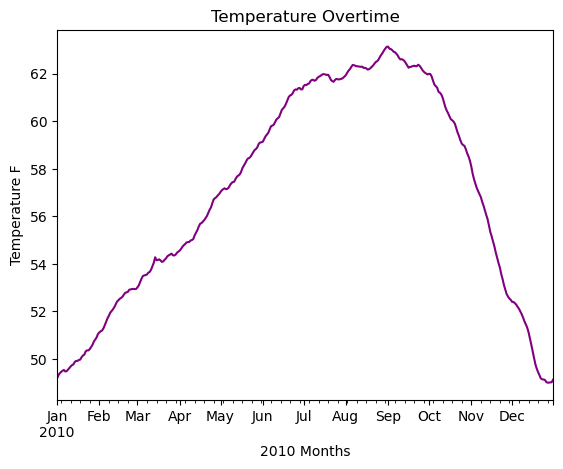

In [15]:
df_daily.temp.plot(color='purple')
plt.title('Average Temperature Overtime')
plt.xlabel ('2010 Months')
plt.ylabel('Temperature F')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

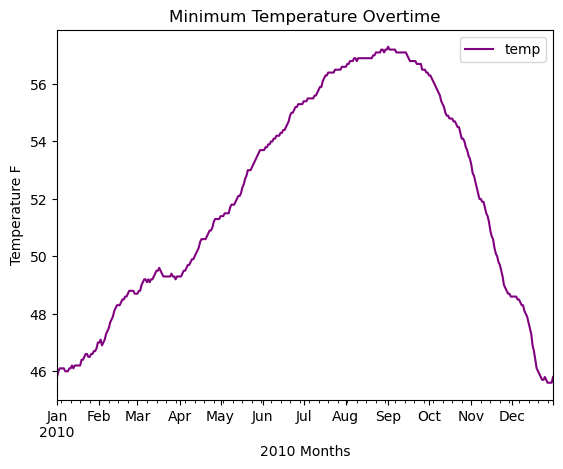

In [35]:
temps_df.resample('D').min().plot(color='purple')
plt.title('Minimum Temperature Overtime')
plt.xlabel ('2010 Months')
plt.ylabel('Temperature F')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

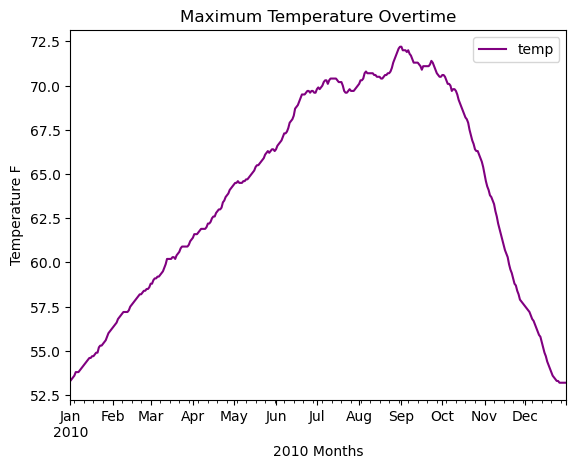

In [36]:
temps_df.resample('D').max().plot(color='purple')
plt.title('Maximum Temperature Overtime')
plt.xlabel ('2010 Months')
plt.ylabel('Temperature F')
plt.show()

### 4. Which month is the coldest, on average?

In [37]:
temps_df.groupby(df.index.month_name()).mean().idxmin()

temp    January
dtype: object

### 5. Which month has the highest average temperature?

In [38]:
temps_df.groupby(df.index.month_name()).mean().idxmax()

temp    September
dtype: object

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [39]:
temp_agg = temps_df.resample('M').agg(['min','max'])

In [29]:
temp_agg['diff']=temp_agg.temp['max'] -temp_agg.temp['min']

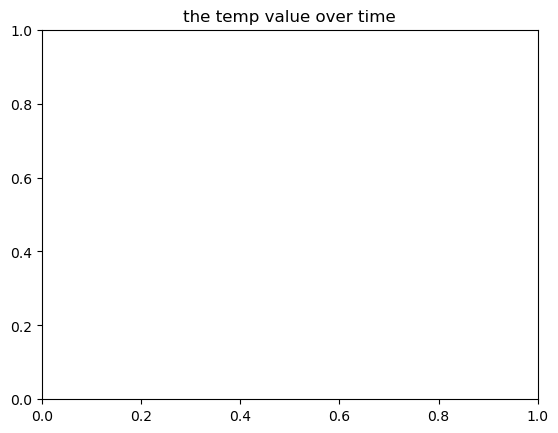

In [40]:
temps_df.resample('D').agg(['min','max']).temp
plt.title('Daily Change in Temperature')
plt.show()

### 7. **Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

### Data from: data.seattle_weather()

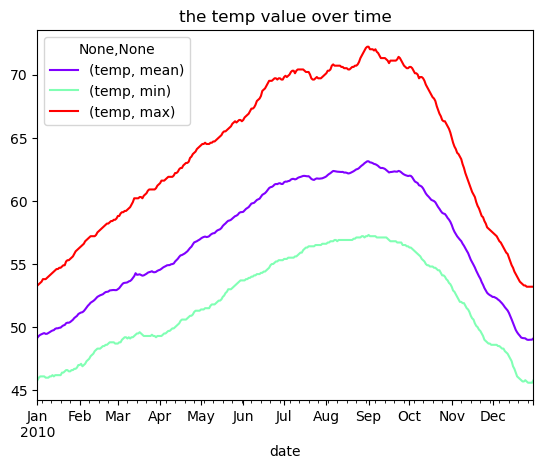

In [47]:
temps_df.resample('D').agg(['mean','min','max']).plot(cmap="rainbow")
plt.title('the temp value over time')
plt.show()

In [54]:
seattle_df=data.seattle_weather()
seattle_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [55]:
seattle_df=seattle_df.set_index('date').sort_index()

In [56]:
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


#### 1. Which year and month combination has the highest amount of precipitation?

In [59]:
seattle_df['month'] = seattle_df.index.month_name()


<function matplotlib.pyplot.show(close=None, block=None)>

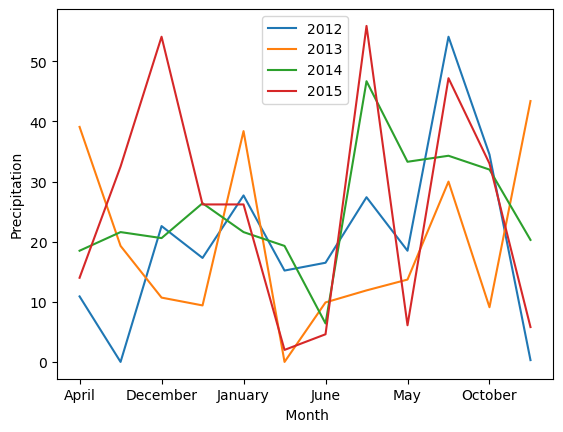

In [62]:
df12=seattle_df.loc['2012']
df13=seattle_df.loc['2013']
df14=seattle_df.loc['2014']
df15=seattle_df.loc['2015']

df12.groupby('month').precipitation.max().plot(label='2012')
df13.groupby('month').precipitation.max().plot(label='2013')
df14.groupby('month').precipitation.max().plot(label='2014')
df15.groupby('month').precipitation.max().plot(label='2015')
plt.legend()
plt.xlabel (' Month')
plt.ylabel('Precipitation')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

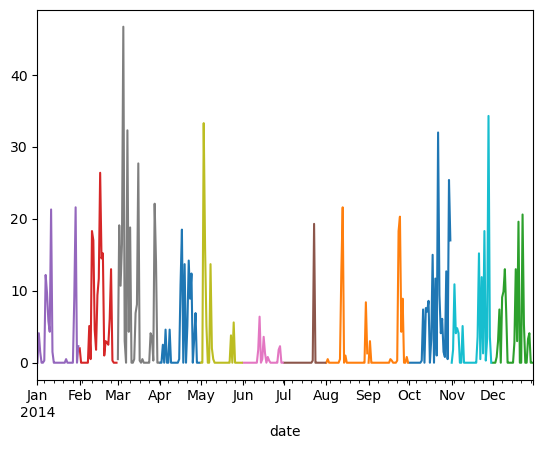

In [19]:
df14.groupby('month').precipitation.plot()
plt.show

2. Visualize the amount of monthly precipitation over time.

<function matplotlib.pyplot.show(close=None, block=None)>

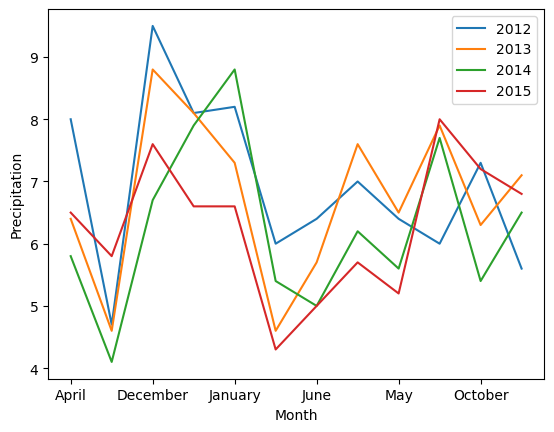

In [63]:
df12.groupby('month').wind.max().plot(label='2012')
df13.groupby('month').wind.max().plot(label='2013')
df14.groupby('month').wind.max().plot(label='2014')
df15.groupby('month').wind.max().plot(label='2015')
plt.legend()
plt.xlabel ('Month')
plt.ylabel('Precipitation')
plt.show

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

/var/folders/0f/gkm6knzn3fscjt7dxlgc9k5h0000gn/T/ipykernel_3540/4229809577.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seattle_df.resample('M').sum().wind.plot(color='purple')


<function matplotlib.pyplot.show(close=None, block=None)>

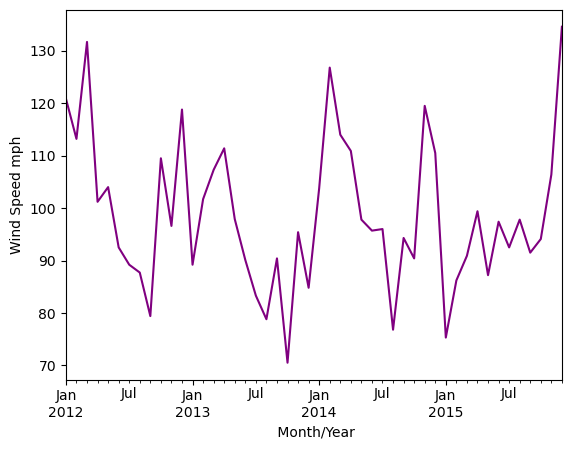

In [72]:
seattle_df.resample('M').sum().wind.plot(color='purple')
plt.xlabel (' Month/Year')
plt.ylabel('Wind Speed mph')
plt.show

4. Which year-month combination is the windiest?

In [67]:
seattle_df.resample('M').sum().wind.sort_values().head(10)

/var/folders/0f/gkm6knzn3fscjt7dxlgc9k5h0000gn/T/ipykernel_3540/3546653540.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seattle_df.resample('M').sum().wind.sort_values().head(10)


date
2013-10-31    70.5
2015-01-31    75.3
2014-08-31    76.8
2013-08-31    78.8
2012-09-30    79.4
2013-07-31    83.3
2013-12-31    84.8
2015-02-28    86.2
2015-05-31    87.2
2012-08-31    87.7
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [68]:
df12[df12.weather=='sun'].shape, df13[df13.weather=='sun'].shape,df14[df14.weather=='sun'].shape,df15[df15.weather=='sun'].shape


((118, 6), (205, 6), (211, 6), (180, 6))

In [71]:
seattle_df[seattle_df.weather=='sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64